In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
merge_data=pd.read_pickle('merge_regression_data.pkl')
merge_data

,time_id_,log_return_realized_volatility_x,log_return_difference,log_return2_realized_volatility,log_return2_difference,wap_balance_mean,price_spread_mean,bid_spread_mean,ask_spread_mean,volume_imbalance_mean,total_volume_mean,total_volume_difference,wap1_std,wap1_mean,wap2_std,wap2_mean,missing_values,log_return_realized_volatility_480,log_return_difference_480,log_return2_realized_volatility_480,log_return2_difference_480,wap_balance_mean_480,price_spread_mean_480,bid_spread_mean_480,ask_spread_mean_480,volume_imbalance_mean_480,total_volume_mean_480,total_volume_difference_480,wap1_std_480,wap1_mean_480,wap2_std_480,wap2_mean_480,log_return_realized_volatility_420,log_return_difference_420,log_return2_realized_volatility_420,log_return2_difference_420,wap_balance_mean_420,price_spread_mean_420,bid_spread_mean_420,ask_spread_mean_420,volume_imbalance_mean_420,total_volume_mean_420,total_volume_difference_420,wap1_std_420,wap1_mean_420,wap2_std_420,wap2_mean_420,log_return_realized_volatility_360,log_return_difference_360,log_return2_realized_volatility_360,log_return2_difference_360,wap_balance_mean_360,price_spread_mean_360,bid_spread_mean_360,ask_spread_mean_360,volume_imbalance_mean_360,total_volume_mean_360,total_volume_difference_360,wap1_std_360,wap1_mean_360,wap2_std_360,wap2_mean_360,log_return_realized_volatility_300,log_return_difference_300,log_return2_realized_volatility_300,log_return2_difference_300,wap_balance_mean_300,price_spread_mean_300,bid_spread_mean_300,ask_spread_mean_300,volume_imbalance_mean_300,total_volume_mean_300,total_volume_difference_300,wap1_std_300,wap1_mean_300,wap2_std_300,wap2_mean_300,stock_id,target
0,5,0.004323,0.001945,0.006440,0.003939,0.000392,0.000864,0.000173,-0.000153,2.351259e+09,334.861314,728,0.000671,1.003792,0.000767,1.003724,266,0.000774,0.000711,0.001268,0.001502,0.000302,0.000843,0.000293,-0.000197,1.908874e+09,276.333333,327.0,0.000173,1.003786,0.000396,1.003632,0.001344,0.000760,0.003385,0.002843,0.000355,0.000774,0.000237,-0.000226,2.675553e+09,307.606557,525,0.000184,1.003836,0.000474,1.003744,0.002119,0.001531,0.003819,0.002843,0.000407,0.000763,0.000246,-0.000199,2.796723e+09,282.883721,525,0.000264,1.003915,0.000484,1.003829,0.002678,0.001638,0.004019,0.002843,0.000379,0.000844,0.000228,-0.000170,2.437684e+09,315.774775,663,0.000270,1.003924,0.000449,1.003825,0,0.001246
1,11,0.000918,0.000544,0.002110,0.001115,0.000194,0.000397,0.000106,-0.000136,2.726580e+09,402.084270,830,0.000199,1.000179,0.000257,1.000170,362,0.000442,0.000484,0.001270,0.001046,0.000202,0.000305,0.000107,-0.000186,2.684355e+09,347.166667,339.0,0.000148,1.000390,0.000333,1.000393,0.000497,0.000484,0.001366,0.001046,0.000239,0.000345,0.000088,-0.000139,2.938662e+09,441.447368,499,0.000125,1.000390,0.000301,1.000293,0.000585,0.000484,0.001493,0.001046,0.000227,0.000375,0.000091,-0.000126,2.863311e+09,513.666667,693,0.000116,1.000340,0.000255,1.000294,0.000596,0.000484,0.001534,0.001046,0.000212,0.000349,0.000100,-0.000122,2.909494e+09,483.881720,830,0.000113,1.000320,0.000234,1.000311,0,0.000779
2,16,0.002346,0.001583,0.004511,0.002444,0.000326,0.000732,0.000189,-0.000195,2.386093e+09,415.816667,626,0.000756,0.999636,0.000750,0.999773,360,0.000704,0.000746,0.001915,0.002061,0.000284,0.000535,0.000206,-0.000168,4.294969e+08,461.800000,394.0,0.000241,0.998176,0.000423,0.998352,0.001112,0.001066,0.002489,0.002172,0.000368,0.000616,0.000139,-0.000187,7.708917e+08,463.820513,476,0.000439,0.998467,0.000698,0.998757,0.001173,0.001066,0.002728,0.002255,0.000416,0.000686,0.000115,-0.000215,1.134520e+09,472.943396,476,0.000564,0.998710,0.000807,0.999064,0.001254,0.001066,0.002741,0.002255,0.000429,0.000704,0.000112,-0.000247,1.288490e+09,458.816667,509,0.000667,0.998853,0.000770,0.999114,0,0.000323
3,31,0.002399,0.002053,0.003378,0.002461,0.000391,0.000845,0.000192,-0.000112,1.900428e+09,428.823009,737,0.000720,0.998899,0.000637,0.998677,427,0.000326,0.000296,0.000319,0.000426,0.000235,0.001012,0.000085,-0.

In [6]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.

    Returns:
        float: MAPE value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    term=np.mean(np.abs((y_true - y_pred))) * 100
    return term/y_pred.mean()

In [14]:
lr_data= .copy()
non_features=["time_id","stock_id","target"]

In [15]:
lr_data

,time_id_,log_return_realized_volatility_x,log_return_difference,log_return2_realized_volatility,log_return2_difference,wap_balance_mean,price_spread_mean,bid_spread_mean,ask_spread_mean,volume_imbalance_mean,total_volume_mean,total_volume_difference,wap1_std,wap1_mean,wap2_std,wap2_mean,missing_values,log_return_realized_volatility_480,log_return_difference_480,log_return2_realized_volatility_480,log_return2_difference_480,wap_balance_mean_480,price_spread_mean_480,bid_spread_mean_480,ask_spread_mean_480,volume_imbalance_mean_480,total_volume_mean_480,total_volume_difference_480,wap1_std_480,wap1_mean_480,wap2_std_480,wap2_mean_480,log_return_realized_volatility_420,log_return_difference_420,log_return2_realized_volatility_420,log_return2_difference_420,wap_balance_mean_420,price_spread_mean_420,bid_spread_mean_420,ask_spread_mean_420,volume_imbalance_mean_420,total_volume_mean_420,total_volume_difference_420,wap1_std_420,wap1_mean_420,wap2_std_420,wap2_mean_420,log_return_realized_volatility_360,log_return_difference_360,log_return2_realized_volatility_360,log_return2_difference_360,wap_balance_mean_360,price_spread_mean_360,bid_spread_mean_360,ask_spread_mean_360,volume_imbalance_mean_360,total_volume_mean_360,total_volume_difference_360,wap1_std_360,wap1_mean_360,wap2_std_360,wap2_mean_360,log_return_realized_volatility_300,log_return_difference_300,log_return2_realized_volatility_300,log_return2_difference_300,wap_balance_mean_300,price_spread_mean_300,bid_spread_mean_300,ask_spread_mean_300,volume_imbalance_mean_300,total_volume_mean_300,total_volume_difference_300,wap1_std_300,wap1_mean_300,wap2_std_300,wap2_mean_300,stock_id,target
0,5,0.004323,0.001945,0.006440,0.003939,0.000392,0.000864,0.000173,-0.000153,2.351259e+09,334.861314,728,0.000671,1.003792,0.000767,1.003724,266,0.000774,0.000711,0.001268,0.001502,0.000302,0.000843,0.000293,-0.000197,1.908874e+09,276.333333,327.0,0.000173,1.003786,0.000396,1.003632,0.001344,0.000760,0.003385,0.002843,0.000355,0.000774,0.000237,-0.000226,2.675553e+09,307.606557,525,0.000184,1.003836,0.000474,1.003744,0.002119,0.001531,0.003819,0.002843,0.000407,0.000763,0.000246,-0.000199,2.796723e+09,282.883721,525,0.000264,1.003915,0.000484,1.003829,0.002678,0.001638,0.004019,0.002843,0.000379,0.000844,0.000228,-0.000170,2.437684e+09,315.774775,663,0.000270,1.003924,0.000449,1.003825,0,0.001246
1,11,0.000918,0.000544,0.002110,0.001115,0.000194,0.000397,0.000106,-0.000136,2.726580e+09,402.084270,830,0.000199,1.000179,0.000257,1.000170,362,0.000442,0.000484,0.001270,0.001046,0.000202,0.000305,0.000107,-0.000186,2.684355e+09,347.166667,339.0,0.000148,1.000390,0.000333,1.000393,0.000497,0.000484,0.001366,0.001046,0.000239,0.000345,0.000088,-0.000139,2.938662e+09,441.447368,499,0.000125,1.000390,0.000301,1.000293,0.000585,0.000484,0.001493,0.001046,0.000227,0.000375,0.000091,-0.000126,2.863311e+09,513.666667,693,0.000116,1.000340,0.000255,1.000294,0.000596,0.000484,0.001534,0.001046,0.000212,0.000349,0.000100,-0.000122,2.909494e+09,483.881720,830,0.000113,1.000320,0.000234,1.000311,0,0.000779
2,16,0.002346,0.001583,0.004511,0.002444,0.000326,0.000732,0.000189,-0.000195,2.386093e+09,415.816667,626,0.000756,0.999636,0.000750,0.999773,360,0.000704,0.000746,0.001915,0.002061,0.000284,0.000535,0.000206,-0.000168,4.294969e+08,461.800000,394.0,0.000241,0.998176,0.000423,0.998352,0.001112,0.001066,0.002489,0.002172,0.000368,0.000616,0.000139,-0.000187,7.708917e+08,463.820513,476,0.000439,0.998467,0.000698,0.998757,0.001173,0.001066,0.002728,0.002255,0.000416,0.000686,0.000115,-0.000215,1.134520e+09,472.943396,476,0.000564,0.998710,0.000807,0.999064,0.001254,0.001066,0.002741,0.002255,0.000429,0.000704,0.000112,-0.000247,1.288490e+09,458.816667,509,0.000667,0.998853,0.000770,0.999114,0,0.000323
3,31,0.002399,0.002053,0.003378,0.002461,0.000391,0.000845,0.000192,-0.000112,1.900428e+09,428.823009,737,0.000720,0.998899,0.000637,0.998677,427,0.000326,0.000296,0.000319,0.000426,0.000235,0.001012,0.000085,-0.

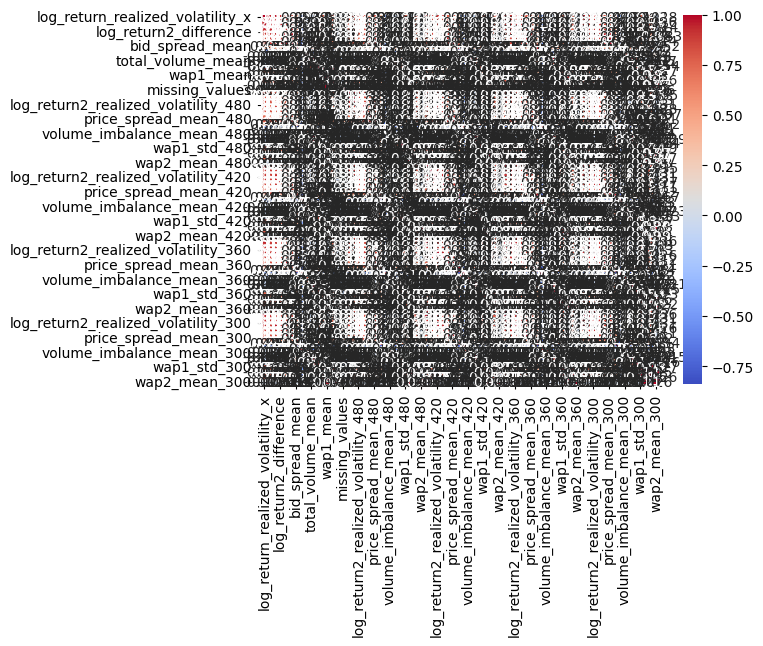

In [16]:
corr_matrix = lr_data.drop(["target","time_id_","stock_id"],axis=1).corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Assuming we drop features that have a correlation greater than 0.8
threshold = 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
lr_data = lr_data.drop(lr_data[to_drop], axis=1)

In [17]:
features=[col for col in lr_data.columns if col not in non_features]
lr_data.dropna(subset=["target"]+features,inplace=True)
features

['time_id_',
 'log_return_realized_volatility_x',
 'bid_spread_mean',
 'ask_spread_mean',
 'volume_imbalance_mean',
 'total_volume_mean',
 'total_volume_difference',
 'wap1_std',
 'wap1_mean',
 'missing_values',
 'log_return_realized_volatility_480',
 'log_return2_realized_volatility_480',
 'wap_balance_mean_480',
 'bid_spread_mean_480',
 'ask_spread_mean_480',
 'volume_imbalance_mean_480',
 'total_volume_difference_480',
 'wap1_std_480',
 'volume_imbalance_mean_420',
 'wap1_std_420']

In [11]:
res_test=[]
res_train=[]
for stock in lr_data.stock_id.unique():
    data=lr_data[lr_data.stock_id==stock]
    X=data[features]
    y=data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    # Fit the model to the data
    model.fit(X_train, y_train)

    # Predict
    pred=model.predict(X_test)
    train_pred=model.predict(X_train)

    res_train.append(mean_absolute_percentage_error(train_pred,y_train))
    res_test.append(mean_absolute_percentage_error(pred,y_test))

mean_train_error = np.mean(res_train)
mean_test_error = np.mean(res_test)

print(f"Mean MAPE on training data: {mean_train_error:.2f}%")
print(f"Mean MAPE on testing data: {mean_test_error:.2f}%")

Mean MAPE on training data: 26.09%
Mean MAPE on testing data: 26.91%


using pca

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
features=[col for col in merge_data.columns if col not in non_features]
features

['time_id_',
 'log_return_realized_volatility_x',
 'log_return_difference',
 'log_return2_realized_volatility',
 'log_return2_difference',
 'wap_balance_mean',
 'price_spread_mean',
 'bid_spread_mean',
 'ask_spread_mean',
 'volume_imbalance_mean',
 'total_volume_mean',
 'total_volume_difference',
 'wap1_std',
 'wap1_mean',
 'wap2_std',
 'wap2_mean',
 'missing_values',
 'log_return_realized_volatility_480',
 'log_return_difference_480',
 'log_return2_realized_volatility_480',
 'log_return2_difference_480',
 'wap_balance_mean_480',
 'price_spread_mean_480',
 'bid_spread_mean_480',
 'ask_spread_mean_480',
 'volume_imbalance_mean_480',
 'total_volume_mean_480',
 'total_volume_difference_480',
 'wap1_std_480',
 'wap1_mean_480',
 'wap2_std_480',
 'wap2_mean_480',
 'log_return_realized_volatility_420',
 'log_return_difference_420',
 'log_return2_realized_volatility_420',
 'log_return2_difference_420',
 'wap_balance_mean_420',
 'price_spread_mean_420',
 'bid_spread_mean_420',
 'ask_spread_mean

In [20]:
res_test = []
res_train = []
merge_data.dropna(subset=["target"]+features,inplace=True)
for stock in merge_data['stock_id'].unique():
    data = merge_data[merge_data['stock_id'] == stock]
    X = data[features]  # Ensure 'features' is defined and includes the names of the columns to use
    y = data["target"]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Applying PCA
    pca = PCA(n_components=0.95)  # retain 95% of variance
    X_pca = pca.fit_transform(X_scaled)

    # Split the PCA-transformed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions
    pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    # Append the MAPE to the results lists
    res_train.append(mean_absolute_percentage_error(y_train, train_pred))
    res_test.append(mean_absolute_percentage_error(y_test, pred))

# Calculate and print the mean of MAPE for both training and testing sets
mean_train_error = np.mean(res_train)
mean_test_error = np.mean(res_test)

print(f"Mean MAPE on training data: {mean_train_error:.2f}%")
print(f"Mean MAPE on testing data: {mean_test_error:.2f}%")

Mean MAPE on training data: 26.40%
Mean MAPE on testing data: 27.04%
